# Iris Species Classifier using various unsupervised  machine learning algorithms

### SP901 Peer-graded Assignment #3

#### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Import the Iris dataset

In [4]:
from sklearn.datasets import load_iris

#### Create an instance of the Iris dataset

In [5]:
df = load_iris()
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df_iris = pd.DataFrame(data=df.data, columns=df.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Isolating sepal data for experimentation
df_iris_sepal=df_iris[['sepal length (cm)','sepal width (cm)']]
df_iris_sepal

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [9]:
# Isolating petal data for experimentation
df_iris_petal=df_iris[['petal length (cm)','petal width (cm)']]
df_iris_petal

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [10]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


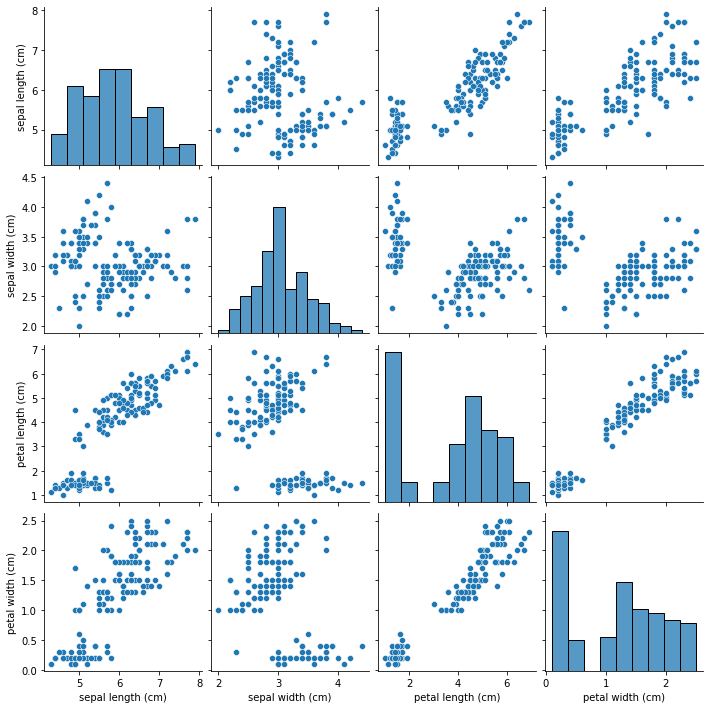

In [11]:
sns.pairplot(df_iris)

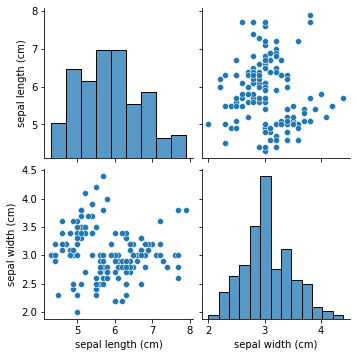

In [40]:
sns.pairplot(df_iris_sepal)

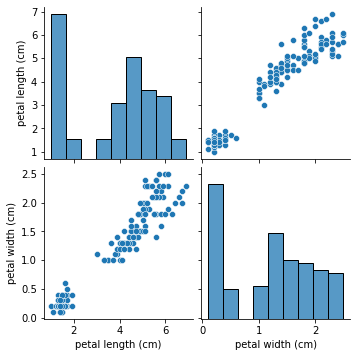

In [42]:
sns.pairplot(df_iris_petal)

In [12]:
df_species = df.target
df_species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_iris,df_species, test_size=0.3)

In [15]:
from sklearn.cluster import KMeans

In [16]:
KMModel = KMeans(n_clusters=3)

In [17]:
KMModel.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
y_pred=KMModel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, adjusted_rand_score, silhouette_score

In [20]:
print(confusion_matrix(y_test, y_pred))

[[ 0 17  0]
 [ 0  0 16]
 [ 9  0  3]]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        16
           2       0.16      0.25      0.19        12

    accuracy                           0.07        45
   macro avg       0.05      0.08      0.06        45
weighted avg       0.04      0.07      0.05        45



In [22]:
print(adjusted_rand_score(y_test,y_pred))

0.8302694201500487


In [44]:
print(silhouette_score(df_iris, df_species))

0.5034774406932957


In [49]:
print(silhouette_score(X_test, y_pred))

0.5741252811998004


### Using the Sepal Data

In [23]:
SX_train, SX_test, Sy_train, Sy_test = train_test_split(df_iris_sepal,df_species, test_size=0.3)

In [24]:
SKMModel=KMeans(n_clusters=3)

In [25]:
SKMModel.fit(SX_train,Sy_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
Sy_pred=SKMModel.predict(SX_test)

In [27]:
print(Sy_pred)

[0 1 1 1 2 0 0 1 1 1 0 1 2 2 1 0 2 2 2 0 2 2 1 1 2 0 1 2 2 2 0 0 0 0 1 1 0
 0 0 0 1 2 0 2 2]


In [28]:
print(classification_report(Sy_test,Sy_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        13
           2       0.80      0.67      0.73        18

    accuracy                           0.27        45
   macro avg       0.27      0.22      0.24        45
weighted avg       0.32      0.27      0.29        45



### Using NO Train-Test Split

In [29]:
UKMModel=KMeans(n_clusters=3)

In [30]:
UKMModel.fit(df_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
UKMModel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [32]:
print(accuracy_score(df_species,UKMModel.labels_))

0.09333333333333334


## Using Scaled Data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaled_df_iris=StandardScaler().fit_transform(df_iris)

In [35]:
SUKMModel=KMeans(n_clusters=3)

In [36]:
SUKMModel.fit(scaled_df_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
SUKMModel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [38]:
df_species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
print(accuracy_score(df_species,SUKMModel.labels_))

0.09333333333333334


In [51]:
print(confusion_matrix(df_species,SUKMModel.labels_))

[[ 0 50  0]
 [11  0 39]
 [36  0 14]]


In [52]:
print(classification_report(df_species,SUKMModel.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.26      0.28      0.27        50

    accuracy                           0.09       150
   macro avg       0.09      0.09      0.09       150
weighted avg       0.09      0.09      0.09       150



In [53]:
print(adjusted_rand_score(df_species,SUKMModel.labels_))

0.6201351808870379


In [57]:
print(silhouette_score(df_iris, SUKMModel.labels_))

0.5061527484935536


In [58]:
print(silhouette_score(df_iris, SUKMModel.labels_))

0.5061527484935536
